In [2]:
#import statements 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [3]:
pop_raw = pd.read_csv('./data/Flight Population Tracking 3.0 - Population Data.csv')
dom_raw = pd.read_csv('./data/Flight Population Tracking 3.0 - Dom Data V2.csv')

In [13]:
##Basic cleaning
flight_pop = pop_raw.iloc[:,0:12].dropna()
flight_pop.head()

,Date,Earth,Plague,Wind,Water,Lightning,Ice,Shadow,Light,Arcane,Nature,Fire
0,6/8/2013,30.0,80.0,169.0,57.0,85.0,72.0,126.0,91.0,115.0,95.0,59.0
1,6/19/2013,464.0,1295.0,1470.0,796.0,1333.0,796.0,1485.0,1000.0,1548.0,1220.0,841.0
2,7/9/2013,803.0,2421.0,3302.0,1509.0,2429.0,1663.0,2092.0,1761.0,2903.0,2229.0,1576.0
3,7/14/2013,887.0,2737.0,3740.0,1701.0,2726.0,1934.0,3299.0,1984.0,3273.0,2486.0,1763.0
4,9/13/2013,1080.0,3448.0,4732.0,2205.0,3513.0,2600.0,4223.0,2581.0,4207.0,3205.0,2203.0


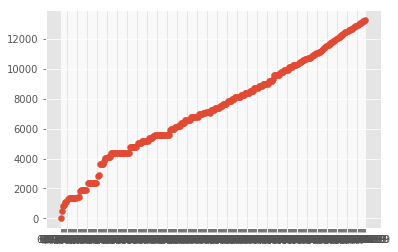

In [15]:
plt.scatter(np.array(flight_pop.loc[:,'Date']),np.array(flight_pop.loc[:,'Earth'])) ##Just checking that this Works

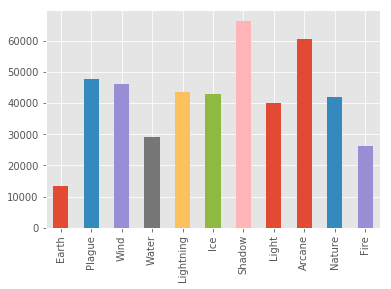

In [14]:
current_pop = flight_pop.iloc[-1,1:12]
current_pop.plot.bar() ##Need to set to flight colors 

In [15]:
##Alright let's make some plots that actually look good
color_lst = ['peru','darkred','lawngreen','slateblue','cyan','lightskyblue',\
            'darkorchid','gold','magenta','darkgreen','darkorange']
flight_lst = flight_pop.iloc[:,1:12].columns.values

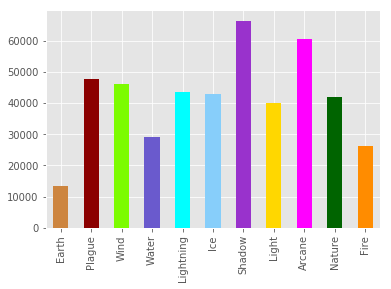

In [16]:
current_pop.plot.bar(stacked=True, color=color_lst)

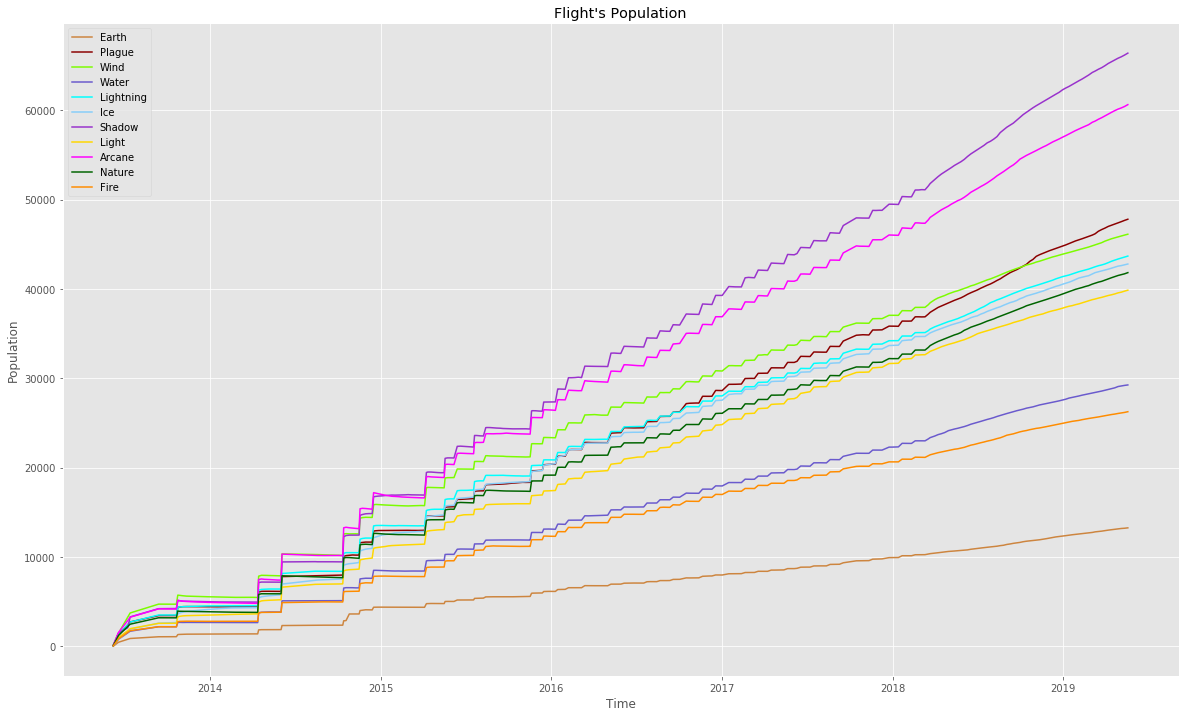

In [53]:
##Gonna transform the date column because it looks bad on a axis 

## We knew this. It's boring
dates = np.array(pd.to_datetime(flight_pop.loc[:,'Date']))
for i in range(len(flight_lst)): 
    plt.plot(dates,np.array(flight_pop.loc[:,flight_lst[i]]),color=color_lst[i],label = flight_lst[i])

plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Flight\'s Population')

plt.legend()
plt.rcParams["figure.figsize"] = (20,12)
plt.show()

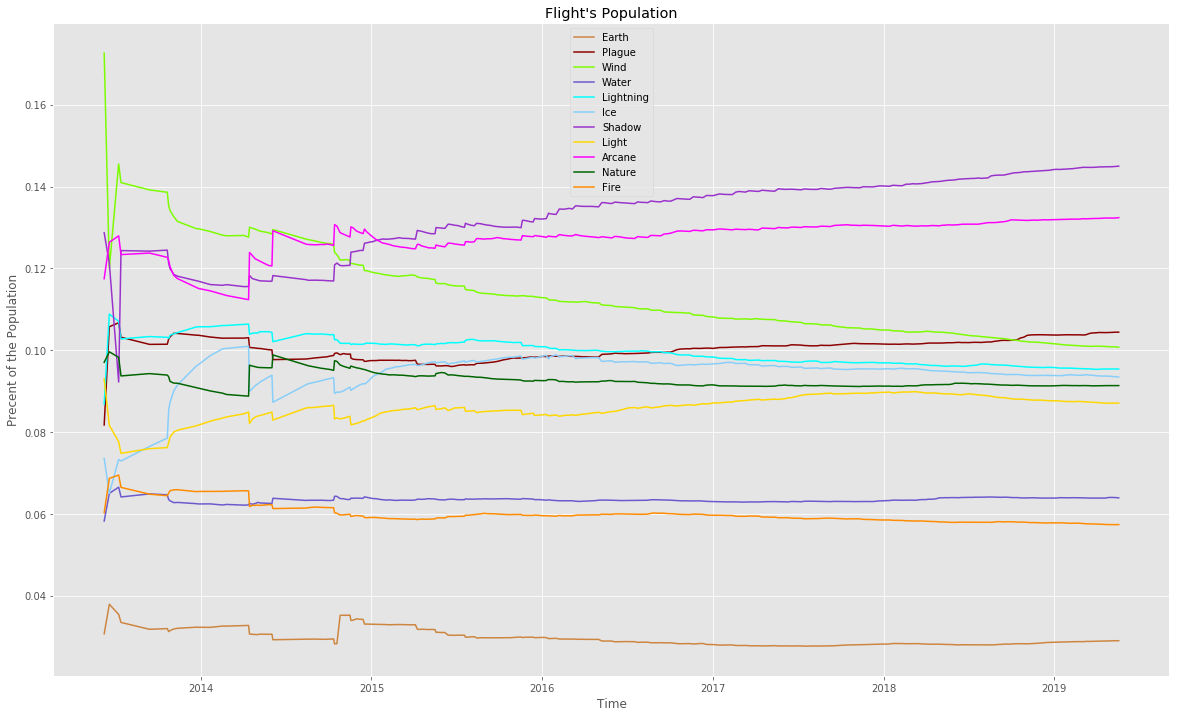

In [144]:
## Try again, normalized by overall population growth 
pop_only = flight_pop.loc[:,flight_lst]
pop_norm = pop_only.div(pop_only.sum(axis=1), axis=0)

for i in range(len(flight_lst)): 
    y = np.array(pop_norm.loc[:,flight_lst[i]])
    plt.plot(dates,y,color=color_lst[i],label = flight_lst[i])

plt.xlabel('Time')
plt.ylabel('Precent of the Population')
plt.title('Flight\'s Population')

plt.legend()
plt.rcParams["figure.figsize"] = (20,12)
plt.show()

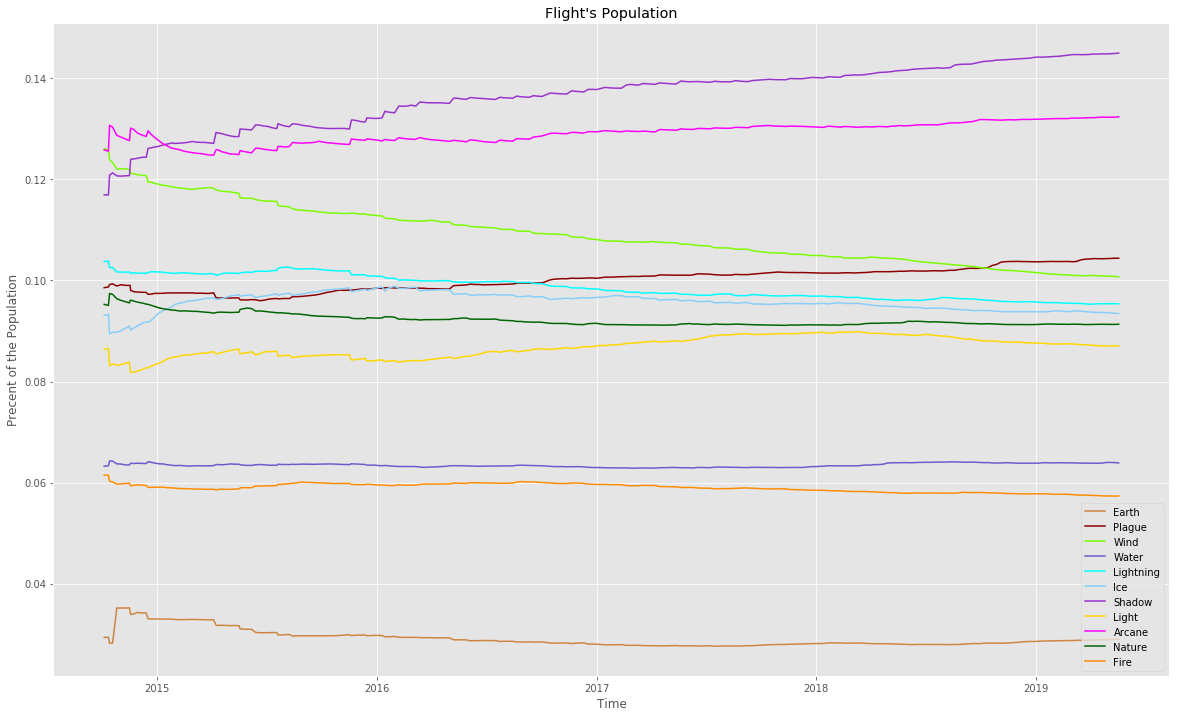

In [73]:
## Try again, normalized by overall population growth with that nasty tail cut off 
pop_only = flight_pop.loc[:,flight_lst]
pop_norm = pop_only.div(pop_only.sum(axis=1), axis=0)

for i in range(len(flight_lst)): 
    y = np.array(pop_norm.loc[:,flight_lst[i]].iloc[31:275])
    dates = np.array(pd.to_datetime(flight_pop.loc[:,'Date'].iloc[31:275]))
    plt.plot(dates,y,color=color_lst[i],label = flight_lst[i])

plt.xlabel('Time')
plt.ylabel('Precent of the Population')
plt.title('Flight\'s Population')

plt.legend()
plt.rcParams["figure.figsize"] = (20,12)
plt.show()

Text(0, 0.5, 'Precent of Population')

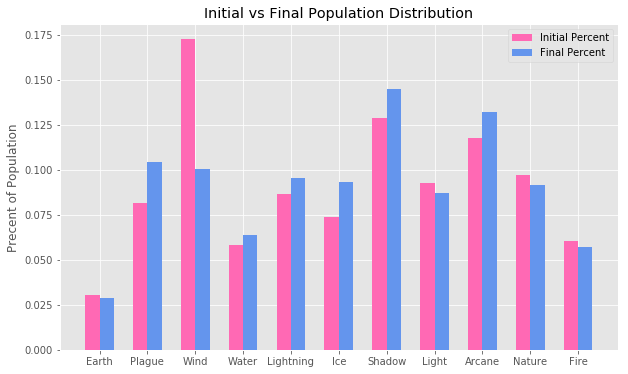

In [125]:
##Bar plots 
init = flight_pop.iloc[0,1:12]/flight_pop.iloc[0,1:12].sum()
fin = flight_pop.iloc[-1,1:12]/flight_pop.iloc[-1,1:12].sum()

x = np.arange(0,21,2)
wid = .6

fig = plt.figure()
plt.rcParams["figure.figsize"] = (10,6)
ax = fig.add_subplot(111)

ax.bar(x-wid, init.values, width=wid, color='hotpink', align='center',label = 'Initial Percent')
ax.bar(x, fin.values, width=wid, color='cornflowerblue', align='center',label = 'Final Percent')
ax.set_xticks(x-wid/2)
ax.set_xticklabels(flight_lst)
ax.legend()
plt.title('Initial vs Final Population Distribution')
ax.set_ylabel("Precent of Population")

In [28]:
##now to hard code the win record 
dom_set = pop_raw.loc[:,'Notes'].iloc[31:275]

##Thank god for near constant formatting 
    ##I should try to figure out an errorbar for this, it's not perfectly consistient 
    ## The reader should note that this is not perfect bc the sheet sometimes records the top 3 instead of just the winner
    ## And I'm too lazy to parse that out
    
dom_record = np.zeros((len(flight_lst),dom_set.shape[0]))

for flight in range(len(flight_lst)):
    win=0
    for val in range(len(dom_set.values)):
        if flight_lst[flight].lower() in dom_set.values[val].lower(): 
            win+=1
            
        dom_record[flight][val] = win 

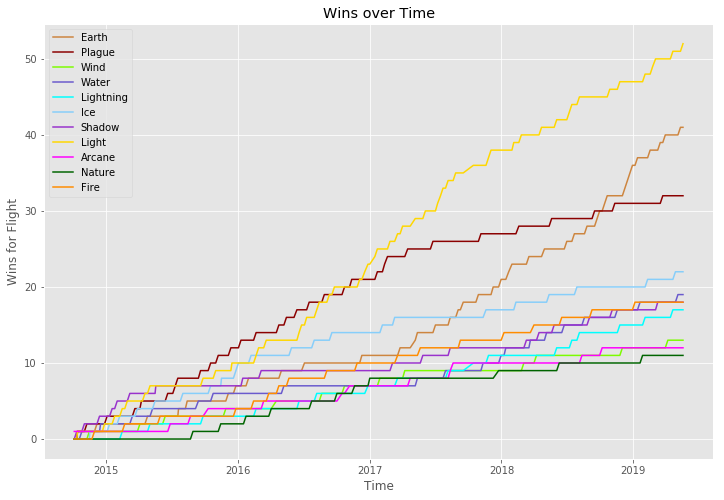

In [68]:
#time = range(dom_record.shape[1])
for i in range(dom_record.shape[0]):
    time = np.array(pd.to_datetime(flight_pop.loc[:,'Date'].iloc[31:275]))
    plt.plot(time, dom_record[i], label = flight_lst[i], color = color_lst[i])
    
    
plt.rcParams["figure.figsize"] = (18,10)
plt.title('Wins over Time')
plt.xlabel('Time')
plt.ylabel('Wins for Flight')
plt.legend()
plt.show()

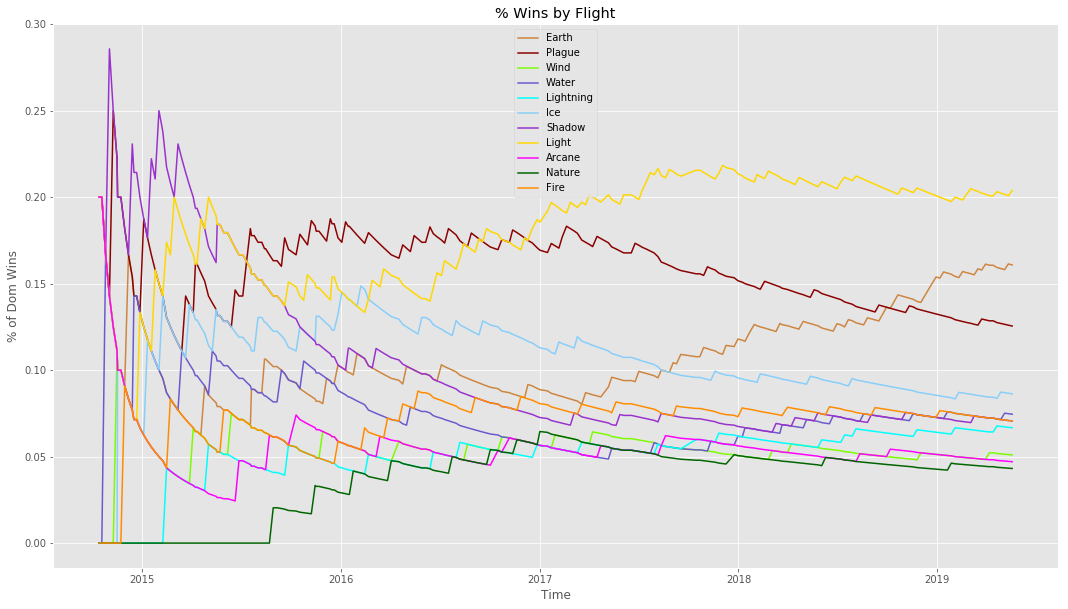

In [69]:
dom_record_df = pd.DataFrame(dom_record.T,columns = flight_lst)
dom_record_norm = dom_record_df.div(dom_record_df.sum(axis=1),axis=0)

for i in range(len(flight_lst)):
    dom  = np.array(dom_record_norm.loc[:,flight_lst[i]].iloc[2:dom_record_df.shape[0]])
    time = np.array(pd.to_datetime(flight_pop.loc[:,'Date'].iloc[33:275]))
    plt.plot(time, dom, label = flight_lst[i], color = color_lst[i])
    
plt.xlabel('Time')
plt.ylabel('% of Dom Wins')
plt.title('% Wins by Flight')
plt.legend()
plt.show()

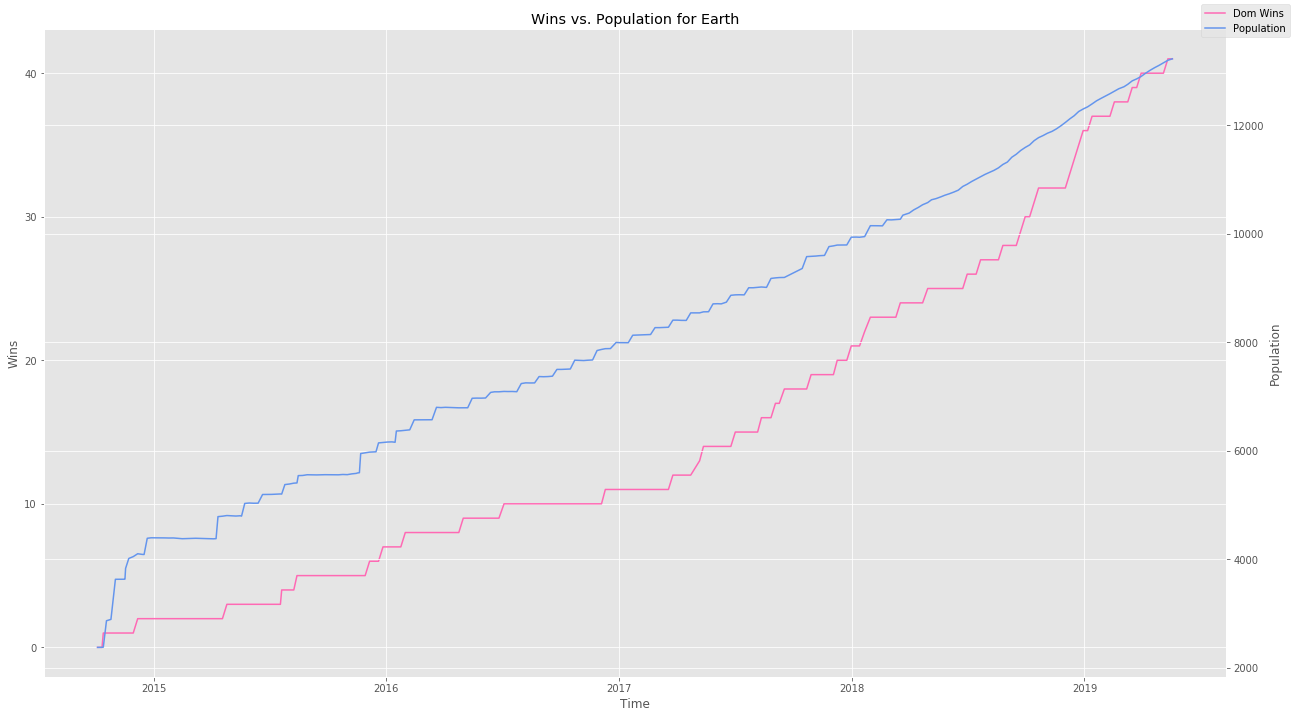

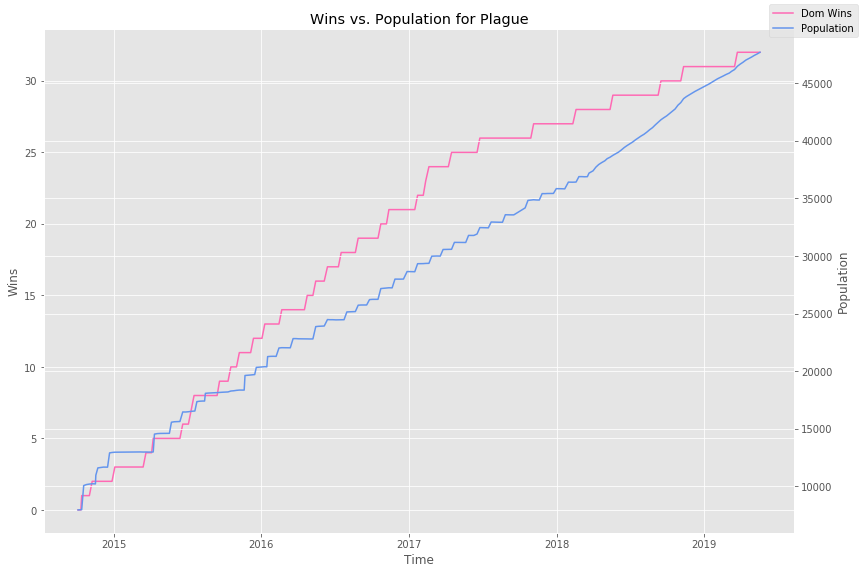

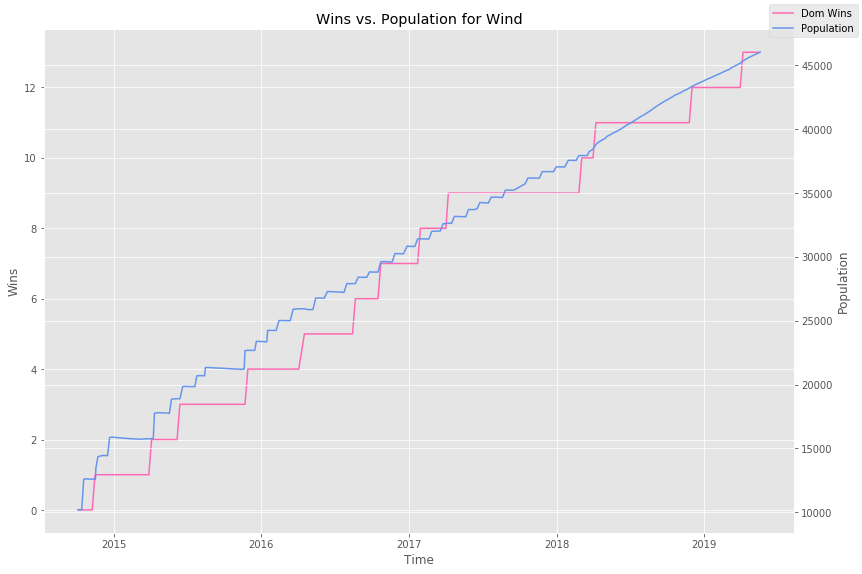

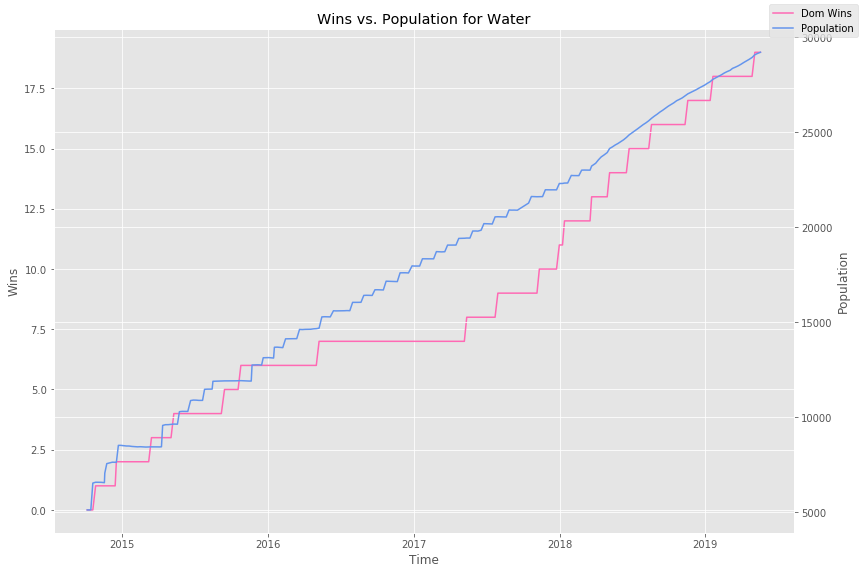

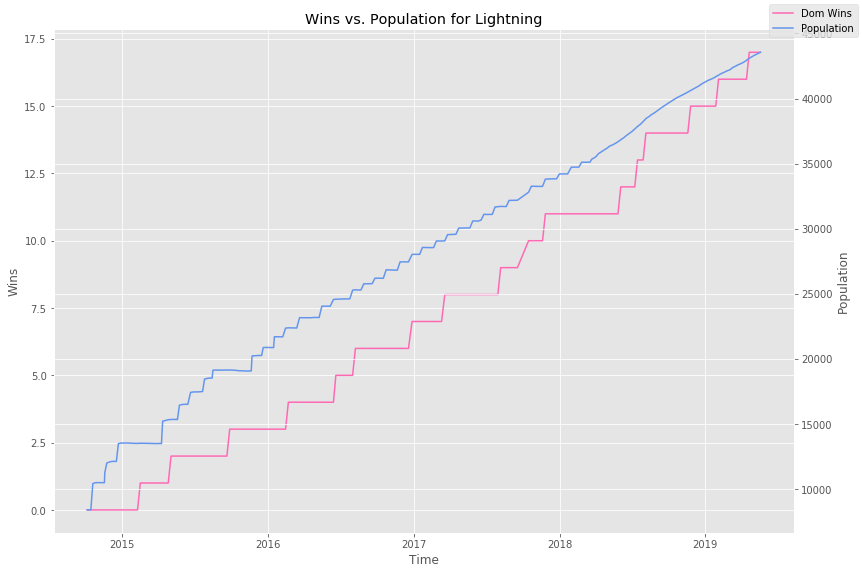

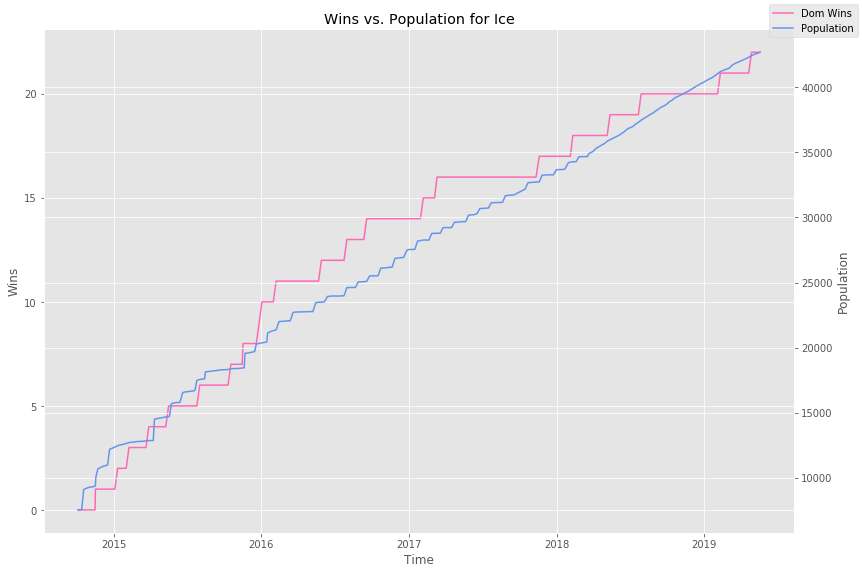

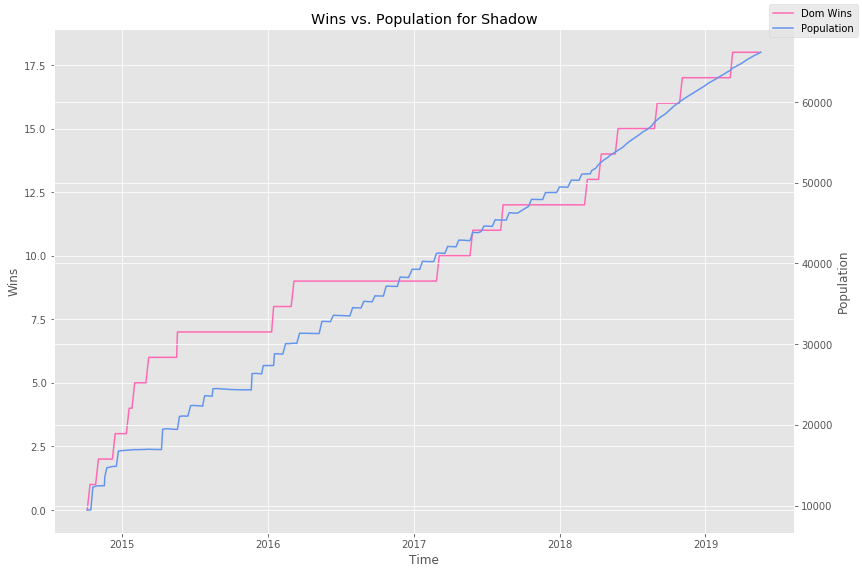

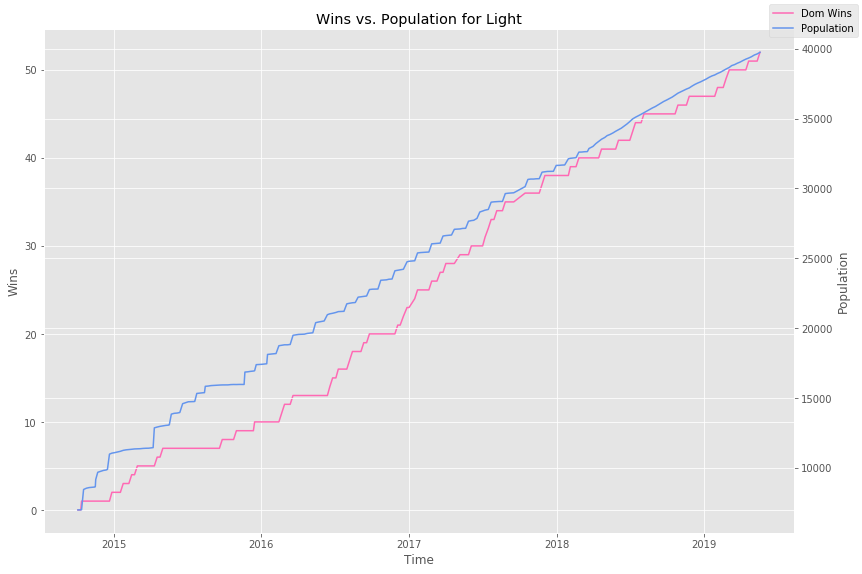

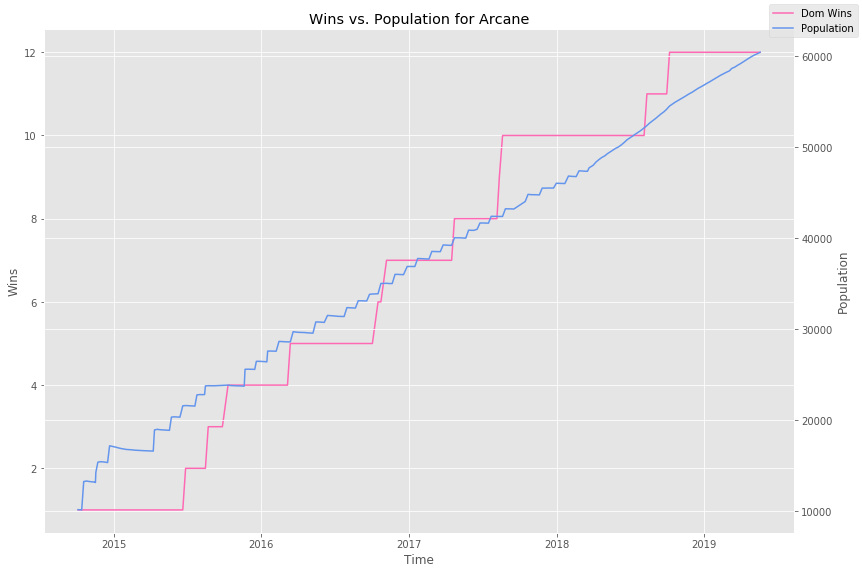

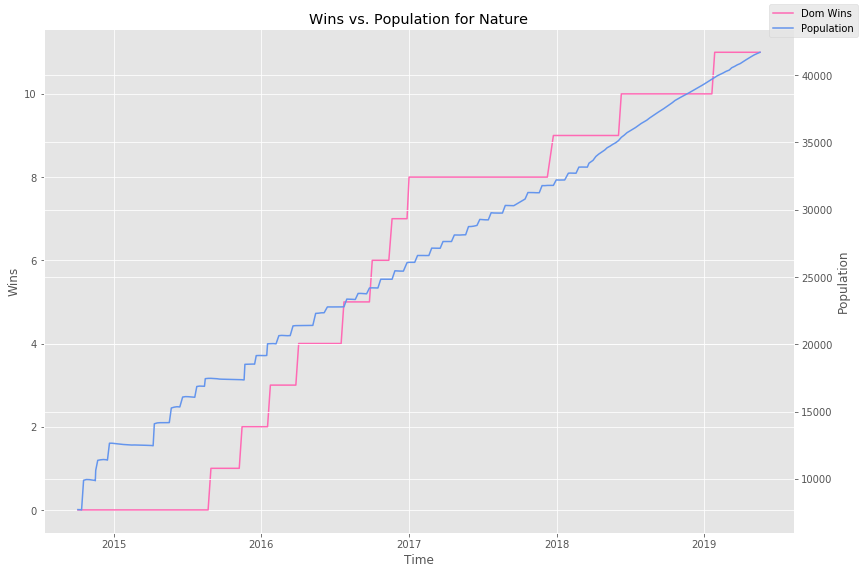

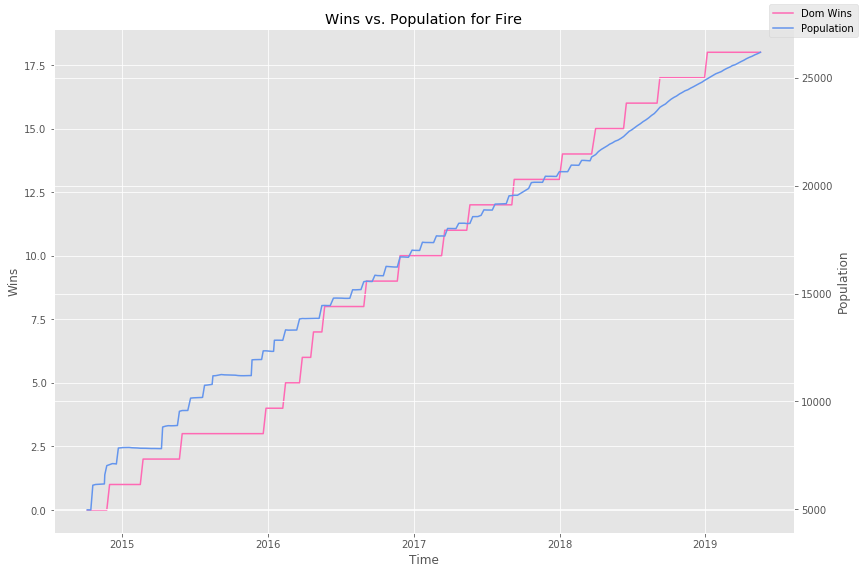

In [70]:
time = np.array(pd.to_datetime(flight_pop.loc[:,'Date'].iloc[31:275]))
for i in range(dom_record.shape[0]):
    
    fig, ax1 = plt.subplots()
    ax1.set_ylabel('Wins')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Population')
    
    ax1.plot(time, dom_record[i], label = 'Dom Wins', color = 'hotpink' )
    ax2.plot(time, pop_raw.loc[:,flight_lst[i]].iloc[31:275], label = 'Population', color = 'cornflowerblue')


    plt.rcParams["figure.figsize"] = (12,8)
    plt.title('Wins vs. Population for '+flight_lst[i])
    ax1.set_xlabel('Time')
    fig.legend()
    fig.tight_layout()
    plt.show()

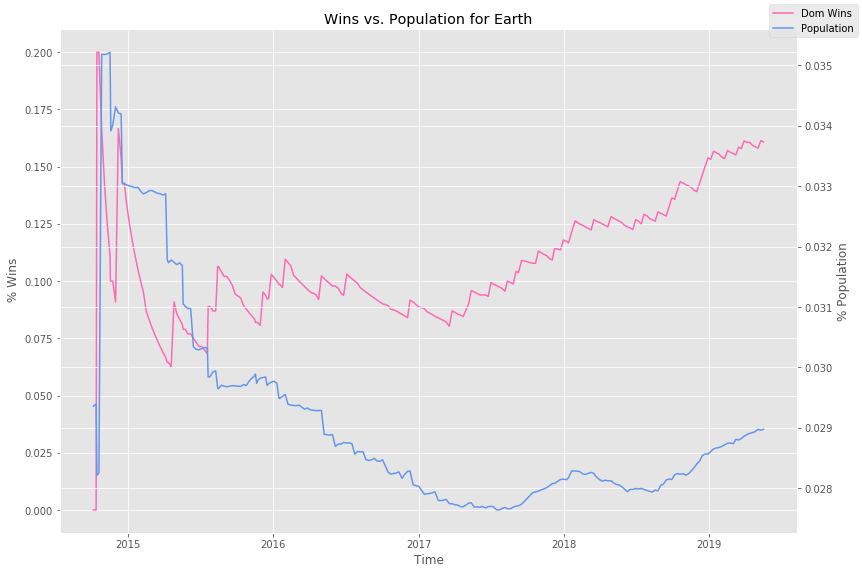

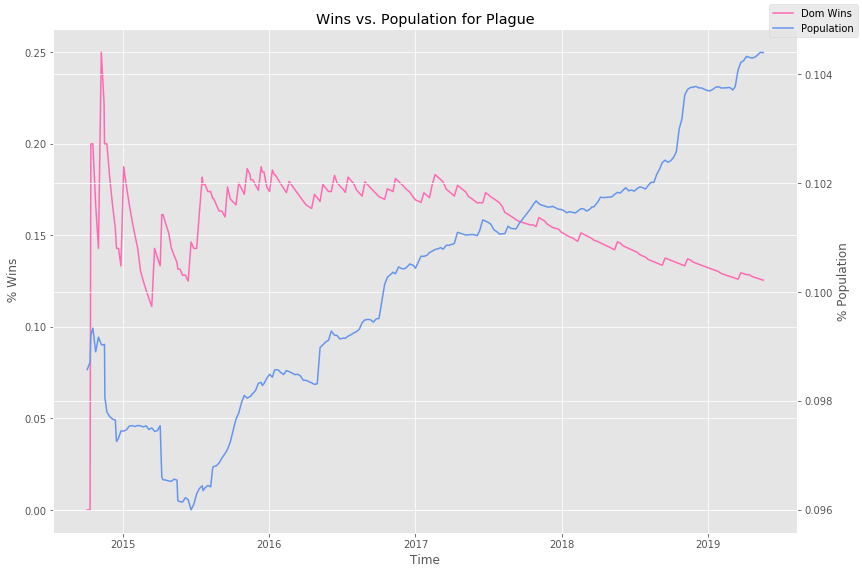

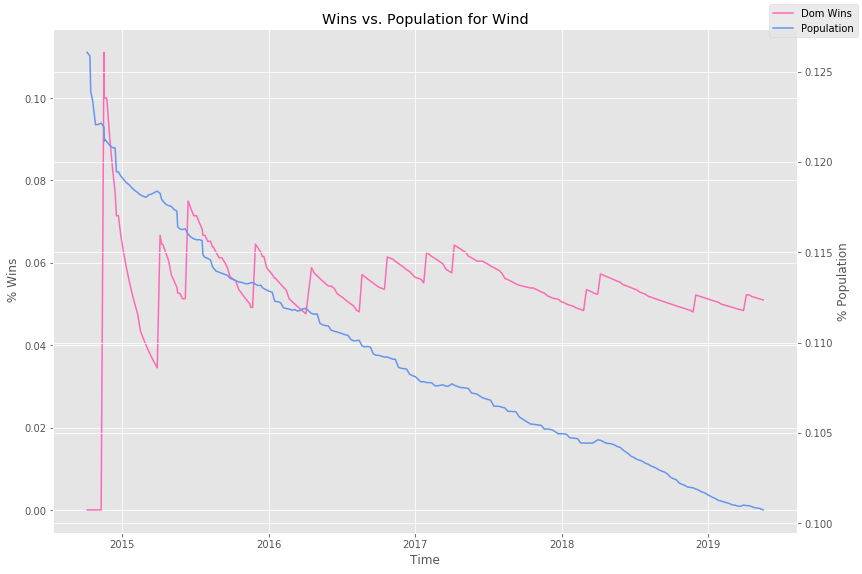

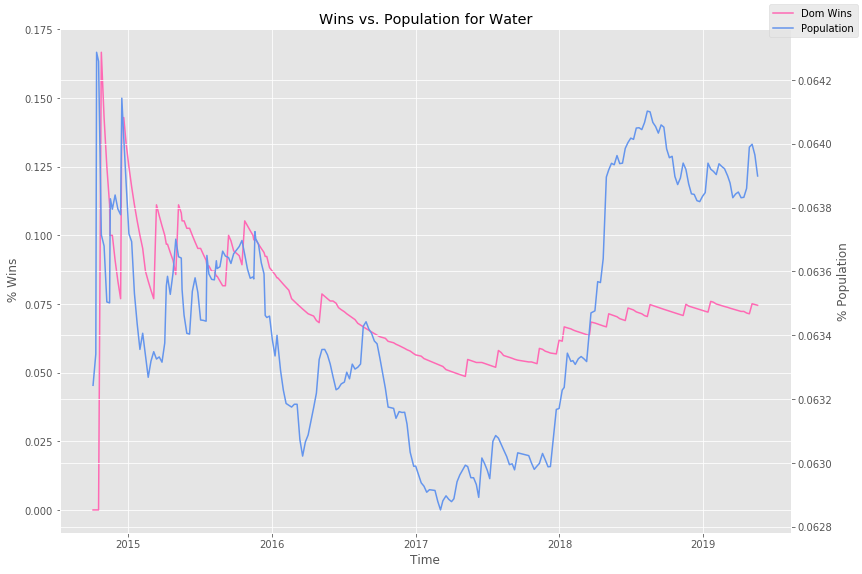

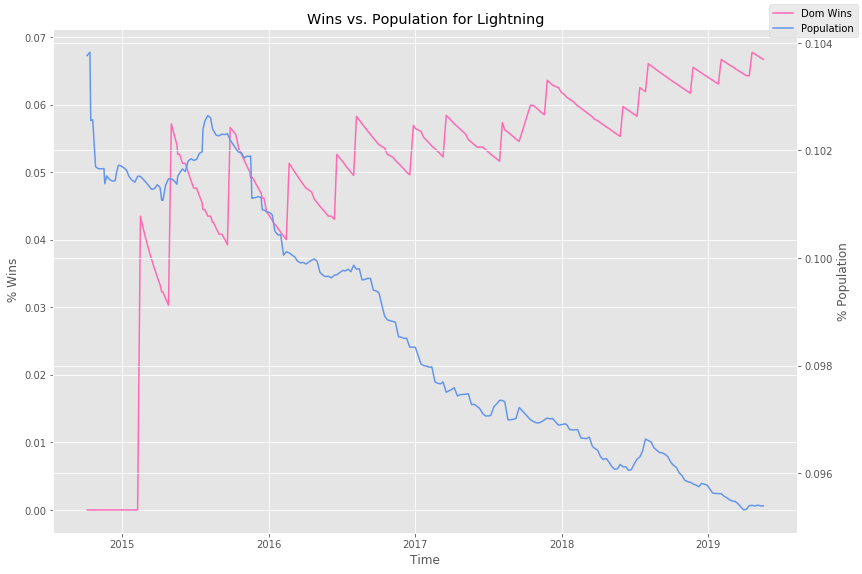

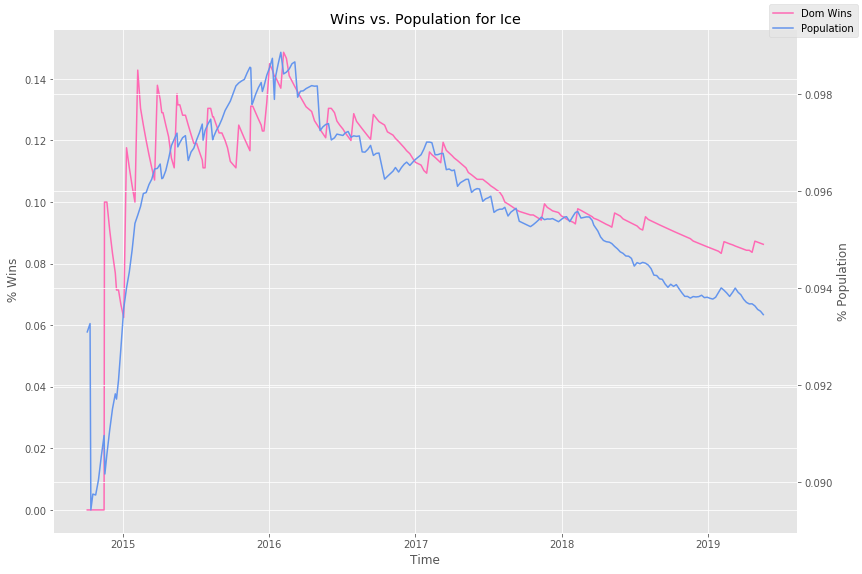

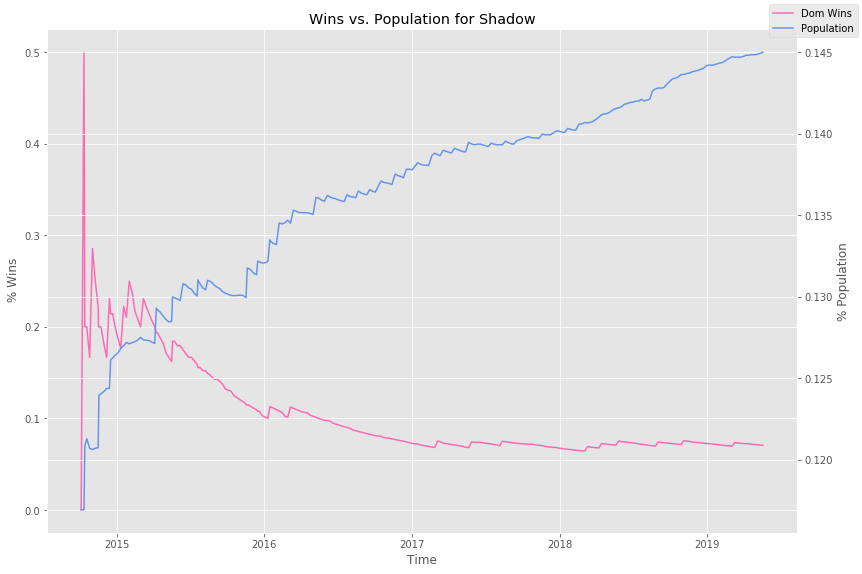

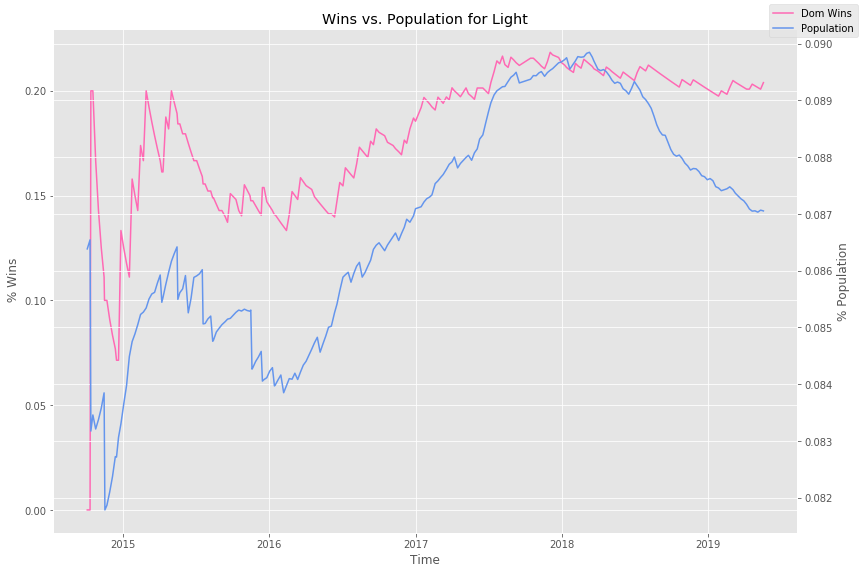

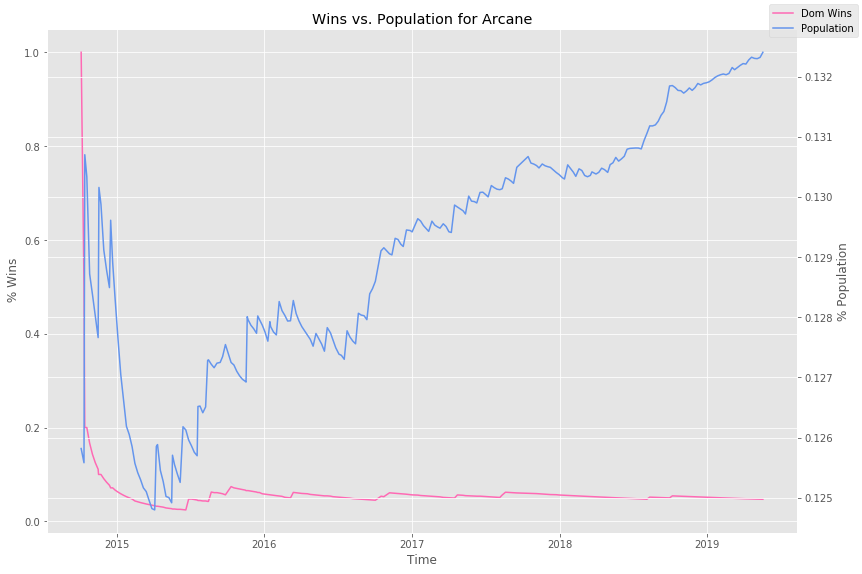

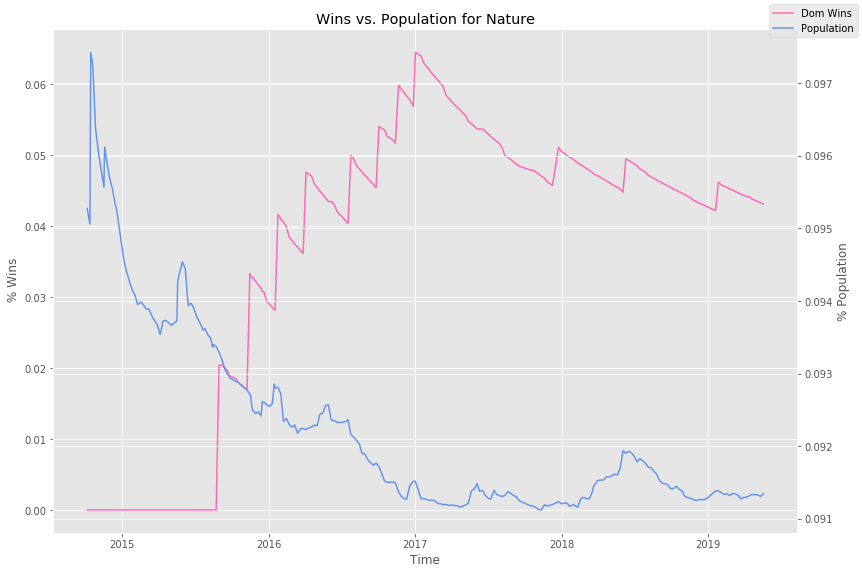

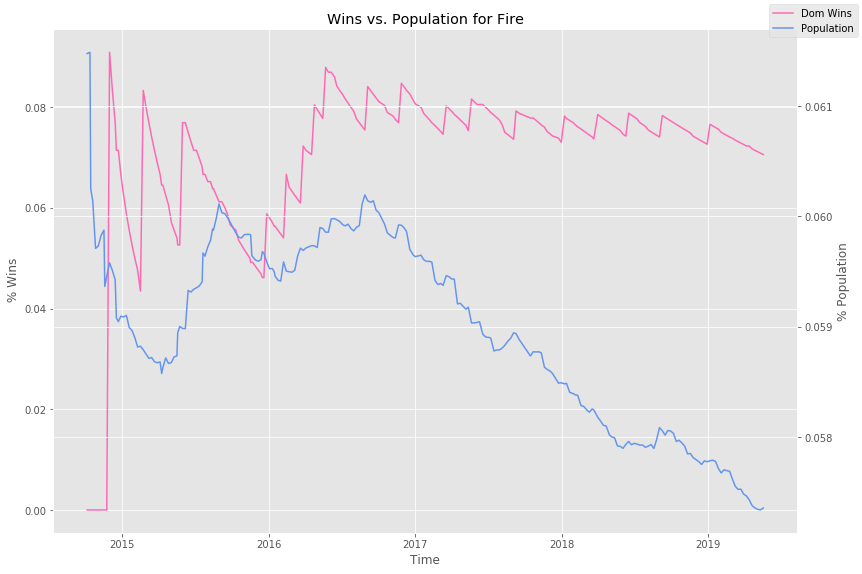

In [71]:
##I think looking at the precentage of wins compared to the percent of population would be more useful again 
    ##Remove/Minimize the time correlation
    
time = np.array(pd.to_datetime(flight_pop.loc[:,'Date'].iloc[31:275]))

pop_only = flight_pop.loc[:,flight_lst]
pop_norm = pop_only.div(pop_only.sum(axis=1), axis=0)

dom_record_df = pd.DataFrame(dom_record.T,columns = flight_lst)
dom_record_norm = dom_record_df.div(dom_record_df.sum(axis=1),axis=0)

for i in range(dom_record.shape[0]):
    
    fig, ax1 = plt.subplots()
    ax1.set_ylabel(' % Wins')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('% Population')
    
    dom  = np.array(dom_record_norm.loc[:,flight_lst[i]])
    percent = np.array(pop_norm.loc[:,flight_lst[i]].iloc[31:275])
    
    ax1.plot(time, dom, label = 'Dom Wins', color = 'hotpink' )
    ax2.plot(time, percent, label = 'Population', color = 'cornflowerblue')


    plt.rcParams["figure.figsize"] = (12,8)
    plt.title('Wins vs. Population for '+flight_lst[i])
    ax1.set_xlabel('Time')
    fig.legend()
    fig.tight_layout()
    plt.show()